#### Name: Fardeen Feroz Khan
#### Reg no: 21BAI1193 (VIT Chennai)

## Assignment - 3: Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**We see that there are null values in some columns**

### EDA

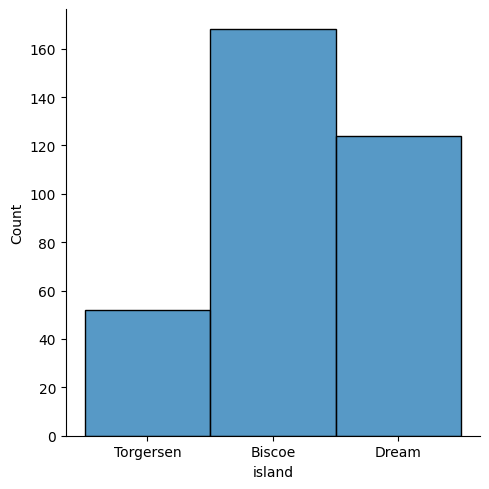

In [11]:
sns.displot(x='island',data=df)

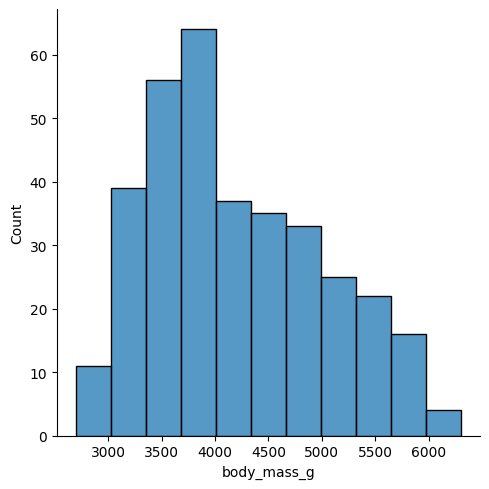

In [14]:
sns.displot(x='body_mass_g',data=df)

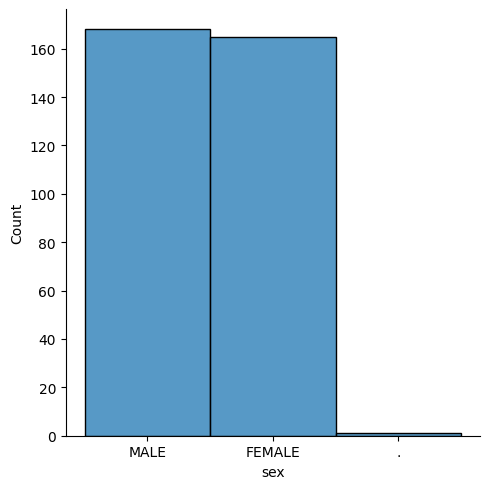

In [16]:
sns.displot(x='sex',data=df)

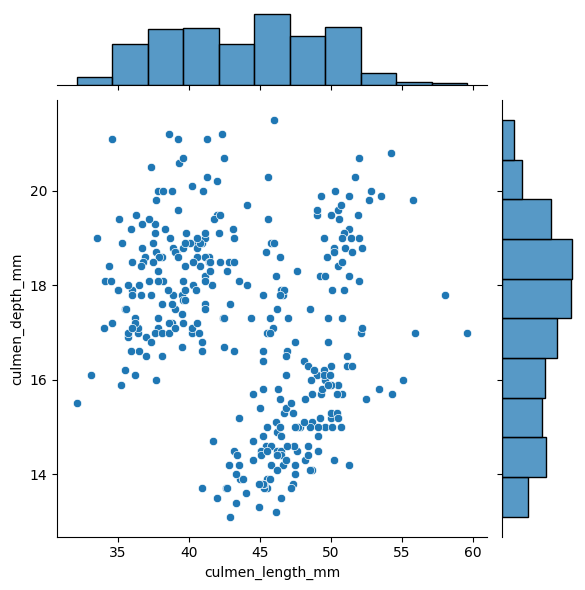

In [17]:
sns.jointplot(x='culmen_length_mm',y='culmen_depth_mm',data=df)

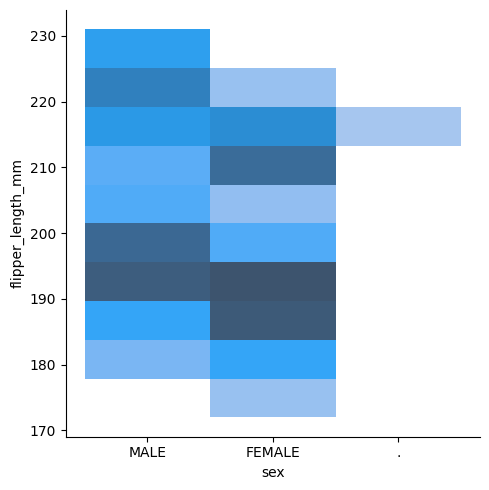

In [24]:
sns.displot(x='sex',y='flipper_length_mm',data=df)

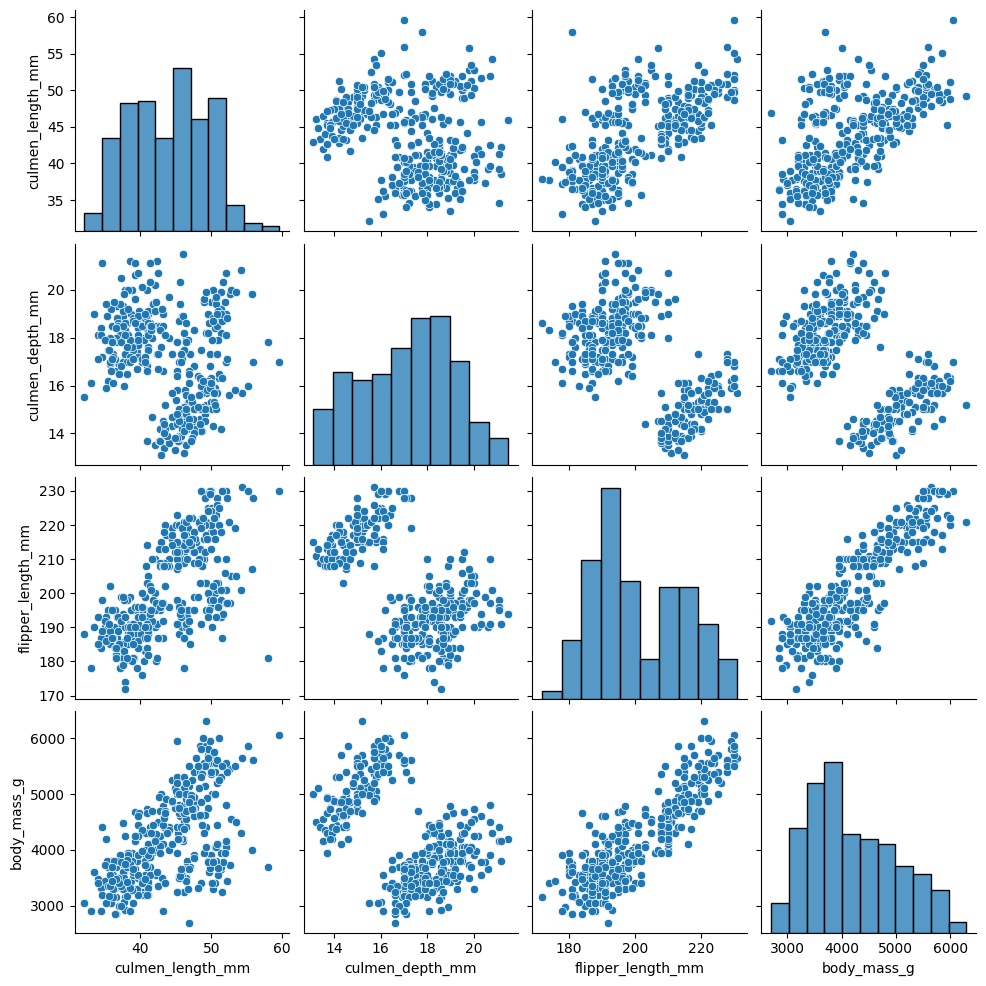

In [25]:
sns.pairplot(df)

### Descriptive Stats

In [27]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Handling missing values

In [28]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [29]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)

df['sex'].fillna(df['sex'].mode().iloc[0],inplace=True)

In [30]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**We have replaced the null values**

### Outlier detection and replacement

<Axes: >

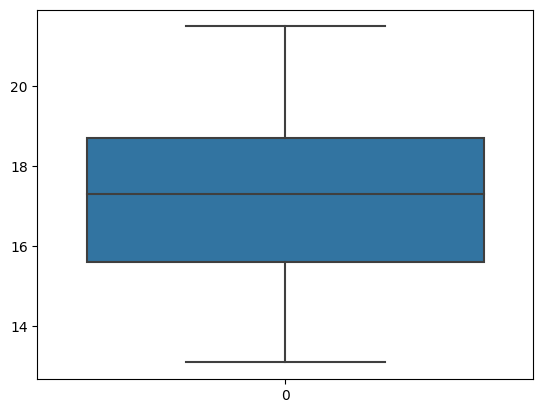

In [32]:
sns.boxplot(df['culmen_depth_mm'])

<Axes: >

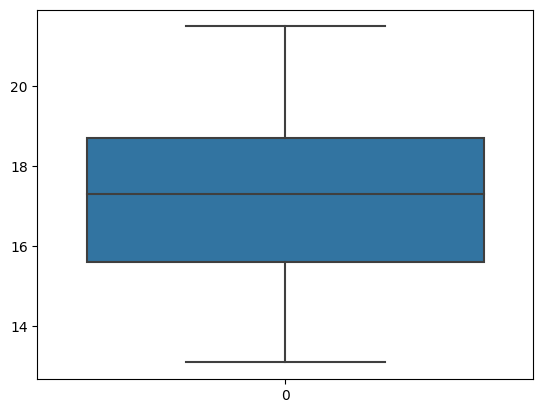

In [33]:
sns.boxplot(df['culmen_depth_mm'])

<Axes: >

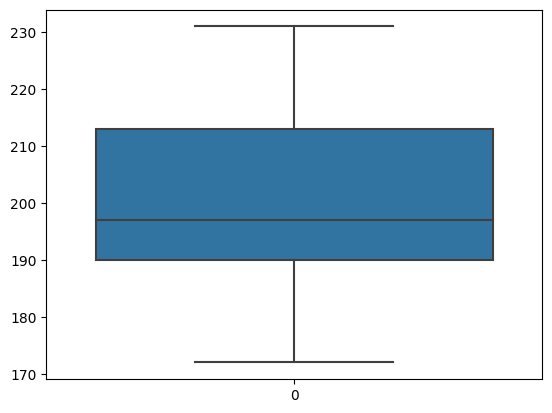

In [34]:
sns.boxplot(df['flipper_length_mm'])

<Axes: >

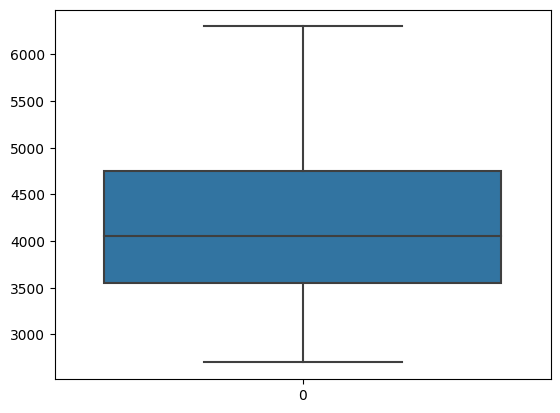

In [35]:
sns.boxplot(df['body_mass_g'])

**We see that there are no outliers in any of the features of the dataset**

### Check for categorical columns and perform encoding

In [40]:
obj_cols = df.select_dtypes(include=['object']).columns
obj_cols

Index(['species', 'island', 'sex'], dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df[obj_cols] = df[obj_cols].apply(encoder.fit_transform)

In [43]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [44]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,2
1,0,2,39.50,17.4,186.0,3800.0,1
2,0,2,40.30,18.0,195.0,3250.0,1
3,0,2,44.45,17.3,197.0,4050.0,2
4,0,2,36.70,19.3,193.0,3450.0,1


### Check the correlation of independent variables with the target


In [49]:
df.corr()['species']

species              1.000000
island              -0.635659
culmen_length_mm     0.728706
culmen_depth_mm     -0.741282
flipper_length_mm    0.850819
body_mass_g          0.747547
sex                 -0.003823
Name: species, dtype: float64

<Axes: >

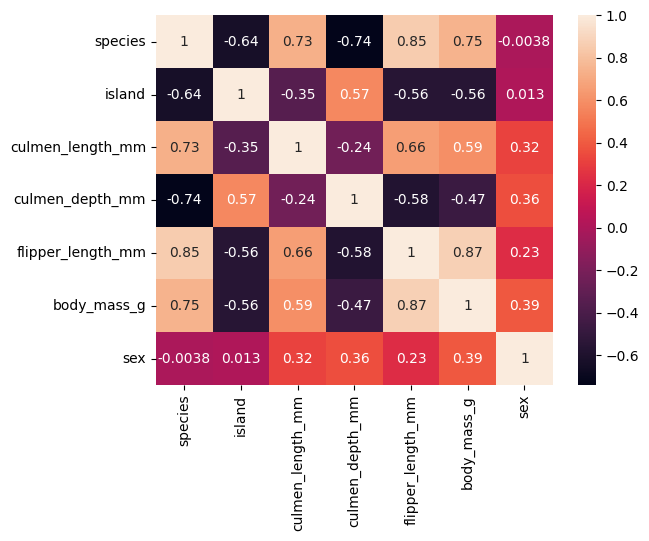

In [51]:
sns.heatmap(df.corr(),annot=True)

### Split the data into dependent and independent variables.

In [53]:
X = df.drop('species',axis=1)
y = df['species']

### Scaling the data

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [55]:
X_scaled

array([[1.        , 0.25454545, 0.66666667, 0.15254237, 0.29166667,
        1.        ],
       [1.        , 0.26909091, 0.51190476, 0.23728814, 0.30555556,
        0.5       ],
       [1.        , 0.29818182, 0.58333333, 0.38983051, 0.15277778,
        0.5       ],
       ...,
       [0.        , 0.66545455, 0.30952381, 0.84745763, 0.84722222,
        1.        ],
       [0.        , 0.47636364, 0.20238095, 0.6779661 , 0.69444444,
        0.5       ],
       [0.        , 0.64727273, 0.35714286, 0.69491525, 0.75      ,
        1.        ]])

### Split the data into training and testing

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [57]:
X_train.shape

(258, 6)

In [58]:
y_train.shape

(258,)

In [59]:
X_test.shape

(86, 6)

In [60]:
y_test.shape

(86,)